# **РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ**

## ***Факультет физико-математических и естественных наук***

## **Отчет по лабораторной работе "Нелинейная регрессия"**

---



### **Студент** : Озьяс Стев Икнэль Дани   ------  **Группа** : НКНбд-01-21



**Вариант 21**

1. Набор данных: wine_quality

2. Независимая переменная: features/total sulfur dioxide

3. Зависимая переменная: features/free sulfur dioxide

4. Доп. признак: имеющий максимальную дисперсию

5. Визуализация доп. признака – эмпирическая плотность распределения

6. Показатель качества регрессии – MAE (mean absolute error)

7. Степень полинома: 3

8. Параметры глубокой нейронной сети: кол-во скрытых слоев – 4, кол-во нейронов в скрытом слое – 64, функция активации – relu.


In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## **Задание 1**

Импортируем **tensorflow** и считаем из него набор данных **wine_quality**:

In [ ]:
ds = tfds.load("wine_quality", split='train')
df = tfds.as_dataframe(ds)
df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


Оставим в наборе данных только признаки, принимающие непрепрывные числовые значения, включая нашу независимую переменную **features/total sulfur dioxide** и зависимую переменную **features/free sulfur dioxide**

In [ ]:
for col in list(df.columns):
  if type(df[col][0]) is bytes:
    df.drop(columns=col,inplace=True)


df.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


## **Задача 2**

Удалим из набора точки с выбросами при помощи стандартизованной оценки (Z-score) таким образом, чтобы точки с выбросами составляли от 5% до 10% всех точек набора данных.

Визуализируем точки исходного набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), показывая оставленные в наборе точки и удаленные точки разными цветами, подписывая оси и рисунок и создавая легенду.

Число точек до удаления выбросов = 4898
Число точек после удаления выбросов = 4636
Процент точек с выбросами =  5.349122090649245 %


Text(0, 0.5, 'features/free sulfur dioxide')

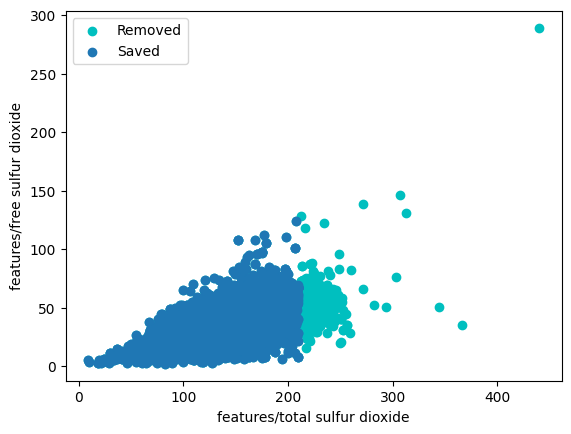

In [ ]:
z_score = 210

print('Число точек до удаления выбросов = %d' % (df.shape[0]))
df2 = df.loc[((df >= -z_score).sum(axis=1)==len(df.axes[1])) & ((df <= z_score).sum(axis=1)==len(df.axes[1])),:]
print('Число точек после удаления выбросов = %d' % (df2.shape[0]))

print("Процент точек с выбросами = ", (df.shape[0] - df2.shape[0]) *100 / df.shape[0], "%")

plt.scatter(df['features/total sulfur dioxide'], df['features/free sulfur dioxide'], c = 'c', label = 'Removed')
plt.scatter(df2['features/total sulfur dioxide'], df2['features/free sulfur dioxide'], label = 'Saved')

plt.legend(loc='upper left')

plt.xlabel('features/total sulfur dioxide')
plt.ylabel('features/free sulfur dioxide')

## **Задание 3**

Выполним стандартизацию независимого признака **features/total sulfur dioxide**

In [ ]:
x = df2['features/total sulfur dioxide'].to_numpy()
x_s = (x - np.mean(x))/np.std(x)

np.mean(x_s), np.std(x_s)

(-1.9912785e-07, 1.0)

Выполним масштабирование на интервал [-1, 1] зависимого признака **features/free sulfur dioxide**

In [ ]:
y = df2['features/free sulfur dioxide'].to_numpy()

scaler = MinMaxScaler(feature_range=(-1, 1))
y_m = scaler.fit_transform(y.reshape(-1, 1))

np.min(y_m), np.max(y_m)

(-0.99999994, 1.0)

Text(0, 0.5, 'features/free sulfur dioxide')

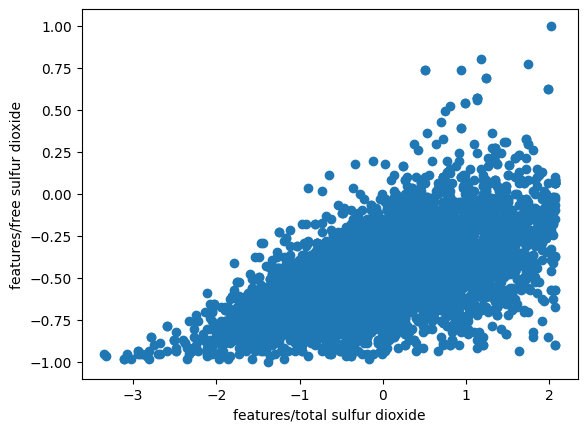

In [ ]:
plt.scatter(x_s, y_m)

plt.xlabel('features/total sulfur dioxide')
plt.ylabel('features/free sulfur dioxide')

Решим задачи линейной регрессии и полиномиальной регрессии для степени полинома, указанной в индивидуальном задании, при помощи нейронных сетей с одним нейроном и оценим качество полученных моделей по показателю **MAE**

Создадим первую модель нейронной сети с одним нейроном

In [ ]:
first_model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ])

In [ ]:
first_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

In [ ]:
history1 = first_model.fit(
    x_s, y_m,
    epochs=100,
    # уровень выводимой информации
    verbose= 1,
    # проверка (валидация) на 30% обучающих данных
    validation_split = 0.3)

Epoch 1/100
102/102 [==============================] - 2s 9ms/step - loss: 0.4620 - val_loss: 0.1674
Epoch 2/100
102/102 [==============================] - 1s 6ms/step - loss: 0.1589 - val_loss: 0.1656
Epoch 3/100
102/102 [==============================] - 1s 6ms/step - loss: 0.1585 - val_loss: 0.1674
Epoch 4/100
102/102 [==============================] - 1s 7ms/step - loss: 0.1587 - val_loss: 0.1655
Epoch 5/100
102/102 [==============================] - 1s 5ms/step - loss: 0.1587 - val_loss: 0.1661
Epoch 6/100
102/102 [==============================] - 0s 5ms/step - loss: 0.1581 - val_loss: 0.1656
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 0.1581 - val_loss: 0.1654
Epoch 8/100
102/102 [==============================] - 1s 5ms/step - loss: 0.1583 - val_loss: 0.1658
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.1584 - val_loss: 0.1656
Epoch 10/100
102/102 [==============================] - 1s 6ms/step - loss: 0.1588 - val_lo

Оценим качество полученной модели по показателю **MAE**

In [ ]:
def my_mae(y_test, y_predict):
    return np.sum(np.absolute(y_predict - y_test))/len(y_test)

In [ ]:
y_predict1 = first_model.predict(x_s)

print("Model score = ", my_mae(y_m, y_predict1))

145/145 [==============================] - 0s 1ms/step
Model score =  0.1600375105534472


Визуализация модели №1

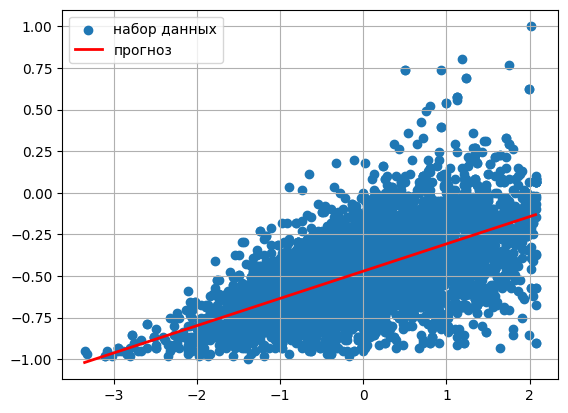

In [ ]:
plt.scatter(x_s, y_m, label='набор данных')
plt.plot(np.sort(x_s), y_predict1[np.argsort(x_s)], color='r', lw=2, label='прогноз')
plt.legend(loc='upper left')
plt.grid();

Решим задачи полиномиальной регрессии для **степени полинома=3** при помощи нейронной сети с одним нейроном

Подготовим для модели регрессии входные данные с тремя признаками – линейной, квадратичной, кубической зависимостью от независимой переменной:

In [ ]:
X = x_s.reshape(-1, 1)
X3 = np.hstack([X, X**2, X**3])  #polynom_degree = 3

Создадим вторую модель нейронной сети с одним нейроном

In [ ]:
second_model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(3,)) ])

In [ ]:
second_model.compile(
    loss='mse',
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    metrics=['mae'])

In [ ]:
history2 = second_model.fit(
    X3, y_m,
    epochs=250,
    # уровень выводимой информации
    verbose= 1,
    # проверка (валидация) на 30% обучающих данных
    validation_split = 0.3)

Epoch 1/250
102/102 [==============================] - 1s 4ms/step - loss: 0.6362 - mae: 0.3524 - val_loss: 0.0477 - val_mae: 0.1694
Epoch 2/250
102/102 [==============================] - 0s 2ms/step - loss: 0.0438 - mae: 0.1601 - val_loss: 0.0459 - val_mae: 0.1667
Epoch 3/250
102/102 [==============================] - 0s 2ms/step - loss: 0.0440 - mae: 0.1608 - val_loss: 0.0477 - val_mae: 0.1694
Epoch 4/250
102/102 [==============================] - 0s 2ms/step - loss: 0.0445 - mae: 0.1623 - val_loss: 0.0464 - val_mae: 0.1675
Epoch 5/250
102/102 [==============================] - 0s 2ms/step - loss: 0.0477 - mae: 0.1683 - val_loss: 0.0470 - val_mae: 0.1689
Epoch 6/250
102/102 [==============================] - 0s 2ms/step - loss: 0.0464 - mae: 0.1653 - val_loss: 0.0477 - val_mae: 0.1707
Epoch 7/250
102/102 [==============================] - 0s 2ms/step - loss: 0.0467 - mae: 0.1654 - val_loss: 0.0465 - val_mae: 0.1673
Epoch 8/250
102/102 [==============================] - 0s 2ms/step - 

Оценим качество полученной модели по показателю **MAE**

In [ ]:
y_predict2 = second_model.predict(X3)

print("Model score = ", my_mae(y_m, y_predict2))

145/145 [==============================] - 0s 1ms/step
Model score =  0.16184867220361032


Визуализация модели №2

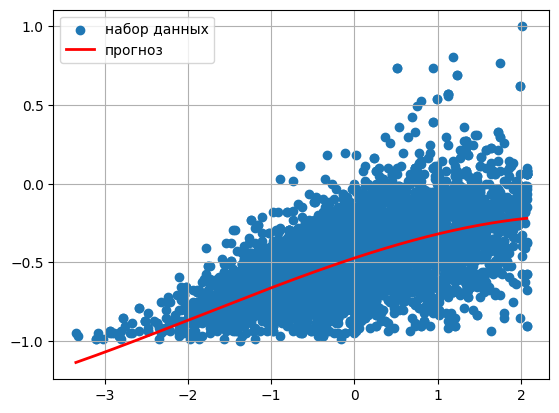

In [ ]:
plt.scatter(x_s, y_m, label='набор данных')
plt.plot(np.sort(x_s), y_predict2[np.argsort(x_s)], color='r', lw=2, label='прогноз')
plt.legend(loc='upper left')
plt.grid();

## **Задание 4**

Построим кривые обучения для построенных нейронных сетей с зависимостью от количества эпох.

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylim([0, max(history.history['loss'])])
  plt.title('Функция потерь при обучении модели')
  plt.xlabel('Эпохи обучения')
  plt.ylabel('Функция потерь')
  plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
  plt.grid(True)

Кривая обучения **нейронной сети №1**

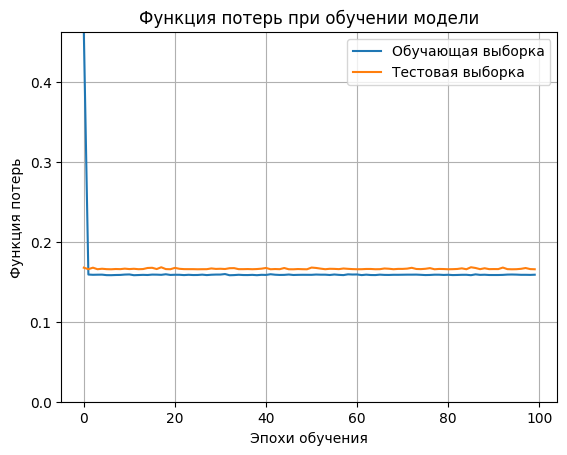

In [ ]:
plot_loss(history1)

Кривая обучения **нейронной сети №2**

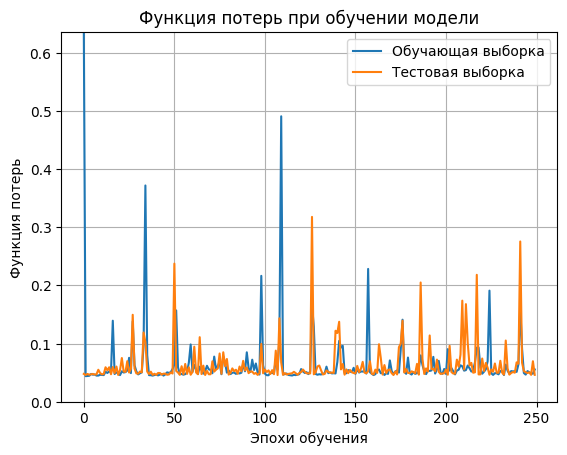

In [ ]:
plot_loss(history2)

## **Задача 5**

Визуализируем точки набора данных на плоскости в виде диаграммы рассеяния (ось X – независимый признак, ось Y – зависимый признак), а также линии линейной и полиномиальной регрессий (другими цветами), подписывая оси и рисунок и создавая легенду.

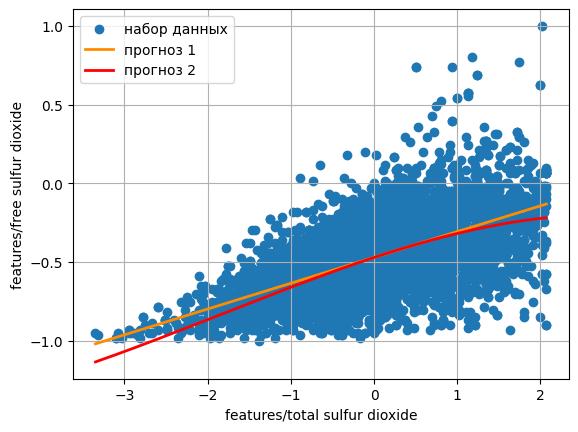

In [ ]:
plt.scatter(x_s, y_m, label='набор данных')
plt.plot(np.sort(x_s), y_predict1[np.argsort(x_s)], color='darkorange', lw=2, label='прогноз 1')
plt.plot(np.sort(x_s), y_predict2[np.argsort(x_s)], color='r', lw=2, label='прогноз 2')
plt.legend(loc='upper left')
plt.xlabel("features/total sulfur dioxide") # ось абсцисс
plt.ylabel("features/free sulfur dioxide") # ось ординат
plt.grid();

## **Задача 6**

Определим в исходном наборе данных признак (отличный от независимого и зависимого признаков), принимающий непрерывные значения и **имеющий максимальную дисперсию**

In [ ]:
var = df2.drop(columns=['features/total sulfur dioxide', 'features/free sulfur dioxide']).var()

max_var = np.max(var)

COL = list(var.index)

print("FEATURE WITH MAXIMAL VARIANCE")
for col in COL:
  if var[col] == max_var:
    print("'", col, "' has maximal variance: ", max_var, sep='')


FEATURE WITH MAXIMAL VARIANCE
'features/residual sugar' has maximal variance: 25.216875076293945


## **Задача 7**

Стандартизуем признак **features/residual sugar**

In [ ]:
sug = df2['features/residual sugar']

sug = (sug - np.mean(sug))/np.std(sug)


np.mean(sug), np.std(sug)

(6.911876e-08, 1.0)

Для визуализации, построим **эмпирическую плотность распределения** стандартизованного признака **features/residual sugar**

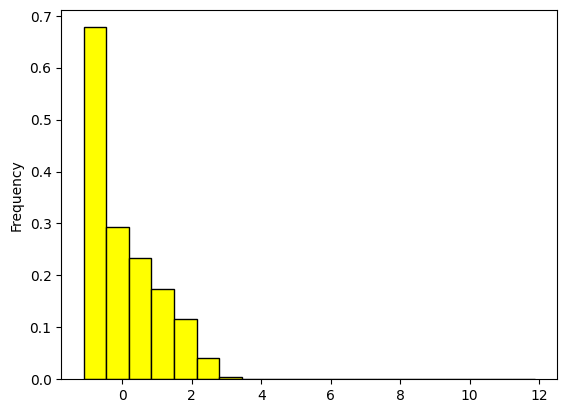

In [ ]:
sug.plot.hist(color='yellow', edgecolor='black', bins=20, density=True);

## **Задача 8**

Сформируем набор входных данных из двух стандартизованных признаков набора данных:
- независимый признак: **features/total sulfur dioxide**
- определенный признак: **features/residual sugar**

In [ ]:
X2 = pd.DataFrame({'features/total sulfur dioxide': x_s, 'features/residual sugar': sug})
X2.head()

,features/total sulfur dioxide,features/residual sugar
0,1.720542,2.425556
1,-1.110448,-0.990031
2,-2.215882,-1.009947
3,-0.813868,0.901985
4,0.048910,-0.472216


Построим нейронную сеть (нелинейный регресор) со следующими характеристиками:
- кол-во скрытых слоев – 4,
- кол-во нейронов в скрытом слое – 64,
- функция активации – relu
- один нейрон в выходном слое

Используем слой нормализации, адаптированный к обоим независимым признакам:

In [ ]:
feature_normalizer = tf.keras.layers.Normalization(axis=None,input_shape=(2,))
feature_normalizer.adapt(X2)

In [ ]:
third_model = tf.keras.Sequential([
    feature_normalizer,
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
third_model.compile(loss='mean_absolute_error')

Обучим ее на наборе данных из наших двух признаков и отклика **features/free sulfur dioxide**.

In [ ]:
history3 = third_model.fit(
    X2, y_m,
    epochs=1000,
    # уровень выводимой информации
    verbose=1,
    # проверка (валидация) на 40% обучающих данных
    validation_split = 0.4)

Epoch 1/1000
87/87 [==============================] - 1s 6ms/step - loss: 0.1790 - val_loss: 0.1681
Epoch 2/1000
87/87 [==============================] - 0s 4ms/step - loss: 0.1597 - val_loss: 0.1629
Epoch 3/1000
87/87 [==============================] - 0s 3ms/step - loss: 0.1582 - val_loss: 0.1609
Epoch 4/1000
87/87 [==============================] - 0s 3ms/step - loss: 0.1577 - val_loss: 0.1618
Epoch 5/1000
87/87 [==============================] - 0s 3ms/step - loss: 0.1568 - val_loss: 0.1623
Epoch 6/1000
87/87 [==============================] - 0s 4ms/step - loss: 0.1568 - val_loss: 0.1629
Epoch 7/1000
87/87 [==============================] - 0s 4ms/step - loss: 0.1569 - val_loss: 0.1632
Epoch 8/1000
87/87 [==============================] - 0s 4ms/step - loss: 0.1559 - val_loss: 0.1638
Epoch 9/1000
87/87 [==============================] - 0s 3ms/step - loss: 0.1559 - val_loss: 0.1621
Epoch 10/1000
87/87 [==============================] - 0s 3ms/step - loss: 0.1551 - val_loss: 0.1613

## **Задача 9**

Визуализируем набор данных в виде диаграммы рассеяния и прогноз нейронной сети в виде поверхности в трехмерном пространстве, подписывая оси и рисунок.

In [ ]:
xs = X2['features/total sulfur dioxide']
ys = X2['features/residual sugar']
zs = y_m
xs.shape, ys.shape, zs.shape

((4636,), (4636,), (4636, 1))

In [ ]:
n_plot = 51

x_plot = np.linspace(np.min(xs), np.max(xs), n_plot)
y_plot = np.linspace(np.min(ys), np.max(ys), n_plot)

In [ ]:
x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
x_mesh.shape, y_mesh.shape

((51, 51), (51, 51))

In [ ]:
x_plot2 = np.reshape(x_mesh, [n_plot**2,1])
y_plot2 = np.reshape(y_mesh, [n_plot**2,1])
Xy = np.hstack([x_plot2, y_plot2])
Xy.shape

(2601, 2)

Теперь выполним прогнозирование при помощи обученной ранее модели

In [ ]:
z = third_model.predict(Xy)
z.shape

82/82 [==============================] - 0s 1ms/step


(2601, 1)

In [ ]:
z_mesh = z.reshape((n_plot, n_plot))
z_mesh.shape

(51, 51)

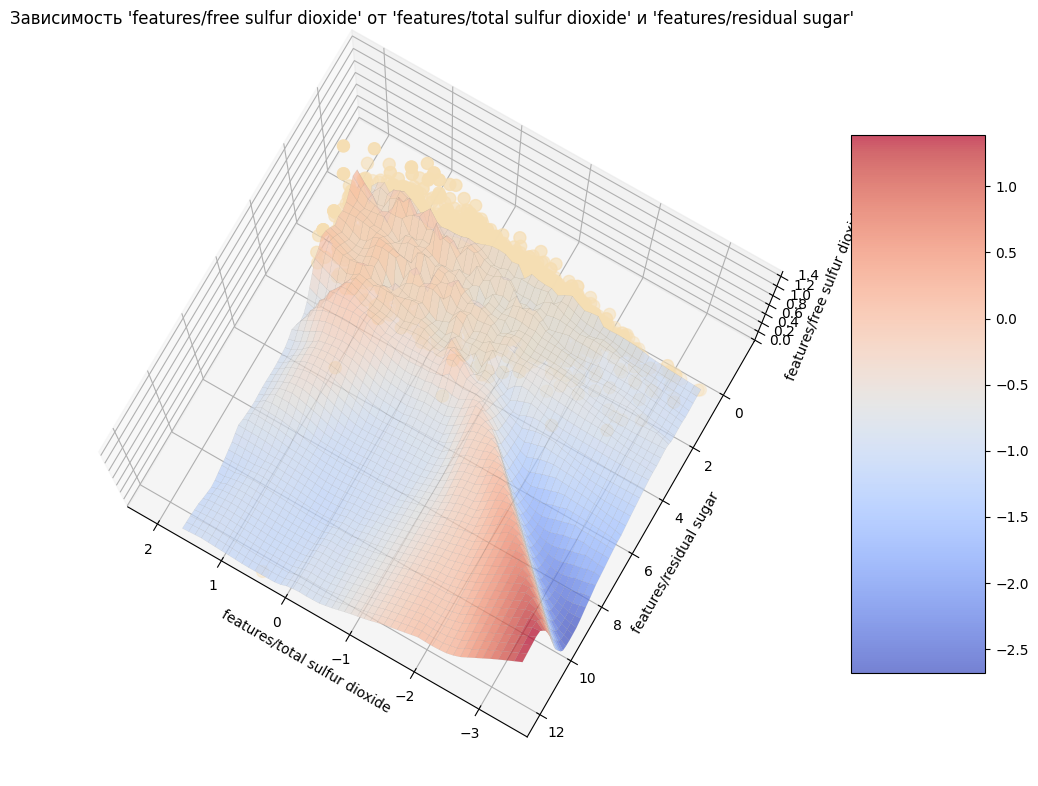

In [ ]:
from matplotlib import cm

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, rstride=1, cstride=1, linewidth=0.05, cmap=cm.coolwarm, alpha=0.7, antialiased=True, \
                       edgecolors='gray')
ax.scatter( xs, ys, zs, s=75, c='wheat' )

ax.set_xlabel('features/total sulfur dioxide', fontsize=10)
ax.set_ylabel('features/residual sugar', fontsize=10)
ax.set_zlabel('features/free sulfur dioxide', fontsize=10)
ax.set_title("Зависимость 'features/free sulfur dioxide' от 'features/total sulfur dioxide' и 'features/residual sugar'", fontsize=12)

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.7, aspect=4)

ax.set_zlim(0., z_mesh.max())
ax.view_init(elev = 80, azim = 120)

## **Задача 10**

Разберем набор данных из двух признаков и отклика на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y_m, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3245, 2), (1391, 2), (3245, 1), (1391, 1))

Построим кривые обучения для показателя **MAE** в зависимости от количества точек в обучающей выборке, подписывая оси и рисунок и создавая легенду.

Всего в обучающей выборке 3245 точек, начнем с 51 точек и будем прибавлять по 50 точек на каждом шаге цикла:

In [ ]:
train_score = []
test_score = []
for i in range(51, 3245, 50):
    large_model = tf.keras.Sequential([
        feature_normalizer,
#        tf.keras.layers.Dense(units=64, activation='relu'),
#        tf.keras.layers.Dense(units=64, activation='relu'),
#        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ])
    large_model.compile(loss='mae')
    large_model.fit(X_train[:i], y_train[:i], epochs=50, verbose=0)

    y_train_predict = large_model.predict(X_train[:i])
    train_score.append(my_mae(y_train[:i], y_train_predict)) #используем нашу функцию my_mae для определения качества модели по MAE

    y_test_predict = large_model.predict(X_test)
    test_score.append(my_mae(y_test, y_test_predict))
    print('-->', i, ' done')

44/44 [==============================] - 0s 1ms/step
--> 51  done
44/44 [==============================] - 0s 1ms/step
--> 101  done
44/44 [==============================] - 0s 1ms/step
--> 151  done
44/44 [==============================] - 0s 2ms/step
--> 201  done
44/44 [==============================] - 0s 1ms/step
--> 251  done
44/44 [==============================] - 0s 2ms/step
--> 301  done
44/44 [==============================] - 0s 1ms/step
--> 351  done
44/44 [==============================] - 0s 1ms/step
--> 401  done
44/44 [==============================] - 0s 1ms/step
--> 451  done
44/44 [==============================] - 0s 1ms/step
--> 501  done
44/44 [==============================] - 0s 1ms/step
--> 551  done
44/44 [==============================] - 0s 2ms/step
--> 601  done
44/44 [==============================] - 0s 1ms/step
--> 651  done
44/44 [==============================] - 0s 1ms/step
--> 701  done
44/44 [==============================] - 0s 1ms/step
--> 751  d

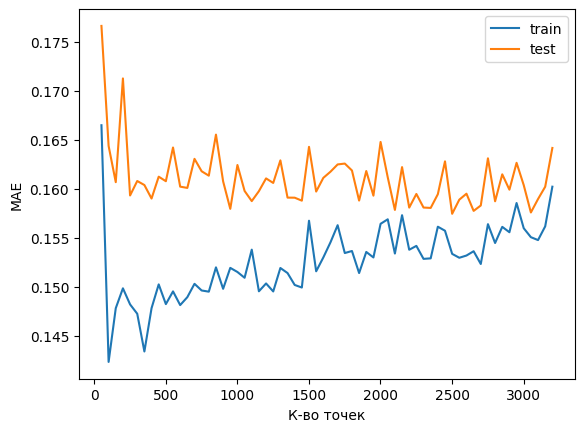

In [ ]:
plt.plot([i for i in range(51, len(X_train)+1, 50)],
                               train_score, label="train")
plt.plot([i for i in range(51, len(X_train)+1, 50)],
                               test_score, label="test")
plt.xlabel('К-во точек')
plt.ylabel('MAE')
plt.legend();
